# Commute Carbon Footprint Analysis: Data Visualization

This notebook focuses on creating insightful visualizations to understand the relationships between traffic conditions, trip characteristics, and carbon emissions in the commute dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load data
df = pd.read_csv('commute_data.csv')

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract time components
df['departure_hour'] = pd.to_datetime(df['departure_time'], format='%H:%M').dt.hour

# Calculate average speed (km/h)
df['avg_speed_kmh'] = df['distance_km'] / (df['trip_duration'] / 60)

# Calculate CO2 per km (emissions efficiency)
df['co2_per_km'] = df['co2_emissions_kg'] / df['distance_km']

# Create traffic condition labels for better readability
traffic_mapping = {0: 'Low', 1: 'Moderate', 2: 'High'}
df['traffic_category'] = df['traffic_condition'].map(traffic_mapping)

print("Data loaded and preprocessed successfully!")

Data loaded and preprocessed successfully!


## 1. Correlation Matrix

Let's start by examining the correlations between the main numerical variables in our dataset.

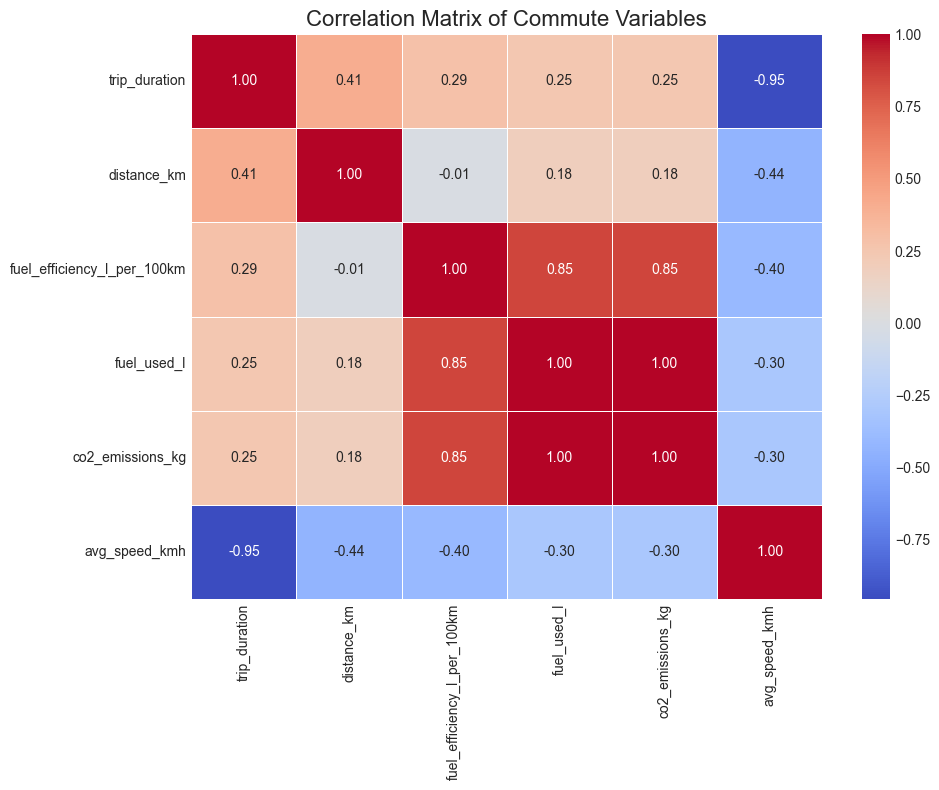

Key insights from the correlation matrix:
1. Trip duration and distance correlation: 0.41
2. Fuel used and CO2 emissions correlation: 1.00
3. Trip duration and fuel efficiency correlation: 0.29
4. Distance and fuel efficiency correlation: -0.01


In [3]:
# Create correlation matrix
numeric_df = df[['trip_duration', 'distance_km', 'fuel_efficiency_l_per_100km', 
                'fuel_used_l', 'co2_emissions_kg', 'avg_speed_kmh']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Commute Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Display key insights from the correlation matrix
print("Key insights from the correlation matrix:")
print(f"1. Trip duration and distance correlation: {correlation_matrix.loc['trip_duration', 'distance_km']:.2f}")
print(f"2. Fuel used and CO2 emissions correlation: {correlation_matrix.loc['fuel_used_l', 'co2_emissions_kg']:.2f}")
print(f"3. Trip duration and fuel efficiency correlation: {correlation_matrix.loc['trip_duration', 'fuel_efficiency_l_per_100km']:.2f}")
print(f"4. Distance and fuel efficiency correlation: {correlation_matrix.loc['distance_km', 'fuel_efficiency_l_per_100km']:.2f}")

## 2. CO2 Emissions by Traffic Condition

Let's visualize how CO2 emissions vary across different traffic conditions.

C:\Users\hp\AppData\Local\Temp\ipykernel_1884\754140809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traffic_category', y='co2_emissions_kg', data=df,


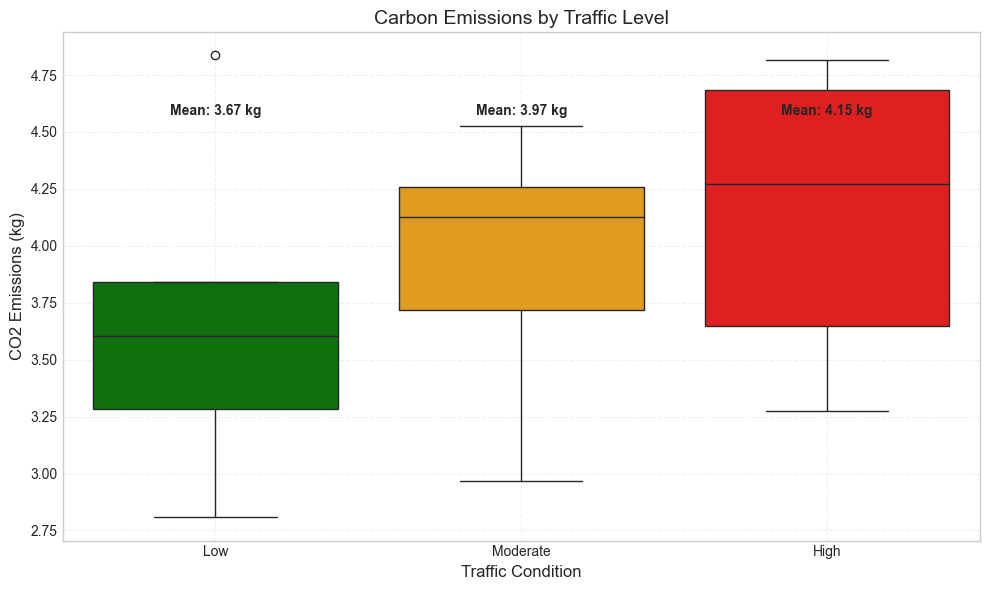

In [4]:
# Create a boxplot of CO2 emissions by traffic condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic_category', y='co2_emissions_kg', data=df,
            order=['Low', 'Moderate', 'High'],
            palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'})
plt.title('Carbon Emissions by Traffic Level', fontsize=14)
plt.xlabel('Traffic Condition', fontsize=12)
plt.ylabel('CO2 Emissions (kg)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add mean values as text
for i, traffic in enumerate(['Low', 'Moderate', 'High']):
    mean_val = df[df['traffic_category'] == traffic]['co2_emissions_kg'].mean()
    plt.text(i, df['co2_emissions_kg'].max() * 0.95, f'Mean: {mean_val:.2f} kg', 
             ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 3. Histogram of CO2 Emissions by Traffic Condition

Now, let's create a histogram to see the distribution of CO2 emissions across different traffic conditions.

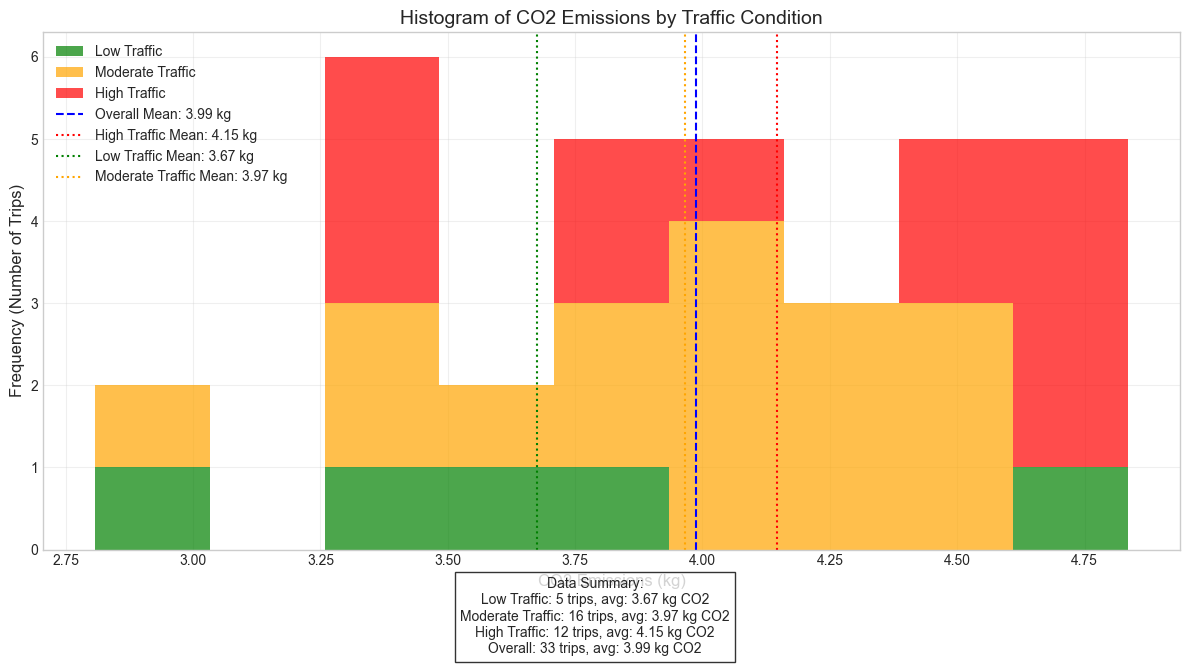

In [5]:
# Set up the figure
plt.figure(figsize=(12, 7))

# Create bins for the histogram
bins = np.linspace(df['co2_emissions_kg'].min(), df['co2_emissions_kg'].max(), 10)

# Create a histogram
if 'traffic_numeric' in df.columns:
    traffic_groups = [df[df['traffic_numeric'] == 0]['co2_emissions_kg'],
                      df[df['traffic_numeric'] == 1]['co2_emissions_kg'],
                      df[df['traffic_numeric'] == 2]['co2_emissions_kg']]
else:
    traffic_groups = [df[df['traffic_condition'] == 0]['co2_emissions_kg'],
                      df[df['traffic_condition'] == 1]['co2_emissions_kg'],
                      df[df['traffic_condition'] == 2]['co2_emissions_kg']]

plt.hist(traffic_groups, 
         bins=bins, 
         label=['Low Traffic', 'Moderate Traffic', 'High Traffic'],
         color=['green', 'orange', 'red'],
         alpha=0.7,
         stacked=True  # This creates a stacked histogram
        )

# Add a vertical line for the overall average
plt.axvline(x=df['co2_emissions_kg'].mean(), color='blue', linestyle='--', linewidth=1.5, 
           label=f'Overall Mean: {df["co2_emissions_kg"].mean():.2f} kg')

# Calculate average for each traffic condition
traffic_means = df.groupby('traffic_category')['co2_emissions_kg'].mean()
colors = {'Low': 'green', 'Moderate': 'orange', 'High': 'red'}

for traffic, avg in traffic_means.items():
    plt.axvline(x=avg, color=colors[traffic], linestyle=':', linewidth=1.5,
               label=f'{traffic} Traffic Mean: {avg:.2f} kg')

# Add labels and title
plt.xlabel('CO2 Emissions (kg)', fontsize=12)
plt.ylabel('Frequency (Number of Trips)', fontsize=12)
plt.title('Histogram of CO2 Emissions by Traffic Condition', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add summary statistics as text
traffic_counts = df.groupby('traffic_category')['co2_emissions_kg'].count()

stats_text = (
    f"Data Summary:\n"
    f"Low Traffic: {traffic_counts.get('Low', 0)} trips, avg: {traffic_means.get('Low', 0):.2f} kg CO2\n"
    f"Moderate Traffic: {traffic_counts.get('Moderate', 0)} trips, avg: {traffic_means.get('Moderate', 0):.2f} kg CO2\n"
    f"High Traffic: {traffic_counts.get('High', 0)} trips, avg: {traffic_means.get('High', 0):.2f} kg CO2\n"
    f"Overall: {len(df)} trips, avg: {df['co2_emissions_kg'].mean():.2f} kg CO2"
)
plt.figtext(0.5, 0.01, stats_text, ha='center', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()

## 4. Fuel Consumption Distribution

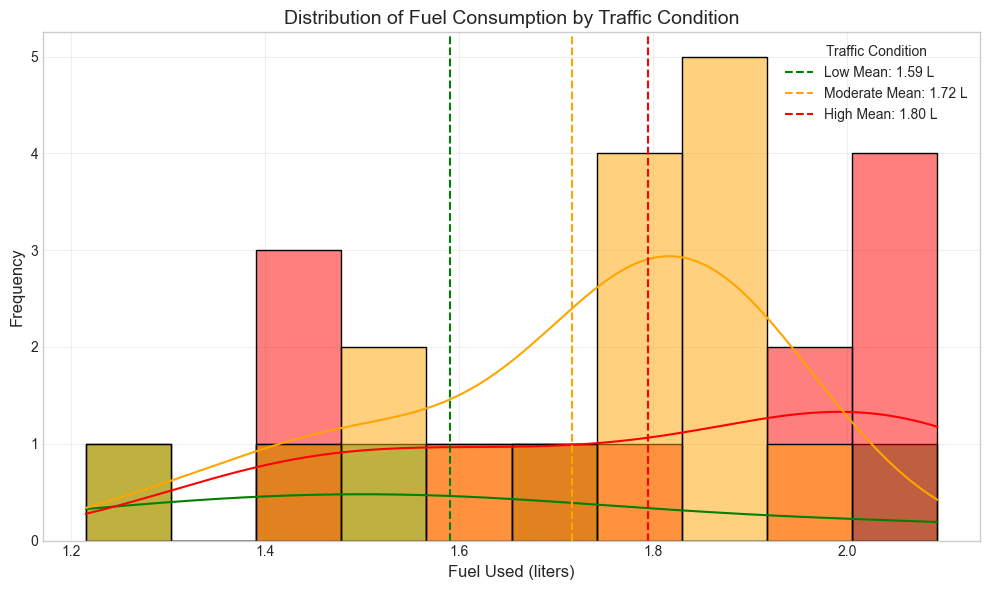

Summary Statistics for Fuel Consumption (liters):


,count,mean,std,min,25%,50%,75%,max
traffic_category,,,,,,,,
Low,5.0,1.59,0.33,1.22,1.42,1.56,1.66,2.09
Moderate,16.0,1.72,0.19,1.28,1.61,1.79,1.84,1.96
High,12.0,1.80,0.27,1.42,1.58,1.85,2.03,2.09


In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='fuel_used_l', hue='traffic_category', 
             bins=10, kde=True, palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'})
plt.title('Distribution of Fuel Consumption by Traffic Condition', fontsize=14)
plt.xlabel('Fuel Used (liters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# Add mean values as vertical lines
for traffic, color in zip(['Low', 'Moderate', 'High'], ['green', 'orange', 'red']):
    subset = df[df['traffic_category'] == traffic]
    if not subset.empty:
        mean_val = subset['fuel_used_l'].mean()
        plt.axvline(x=mean_val, color=color, linestyle='--', 
                   label=f'{traffic} Mean: {mean_val:.2f} L')

plt.legend(title='Traffic Condition')
plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary Statistics for Fuel Consumption (liters):")
fuel_stats = df.groupby('traffic_category')['fuel_used_l'].describe().round(2)
# Reorder to have Low, Moderate, High sequence
fuel_stats = fuel_stats.reindex(['Low', 'Moderate', 'High'])
fuel_stats

## 5. Trip Duration vs. Traffic Condition

C:\Users\hp\AppData\Local\Temp\ipykernel_1884\1603379261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traffic_category', y='trip_duration', data=df,


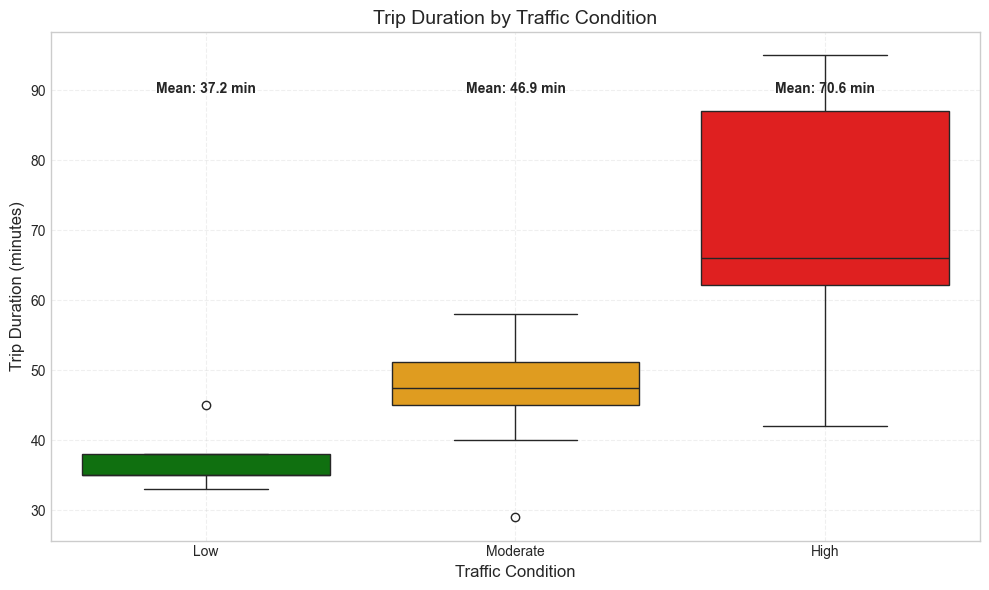

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic_category', y='trip_duration', data=df,
            order=['Low', 'Moderate', 'High'],
            palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'})
plt.title('Trip Duration by Traffic Condition', fontsize=14)
plt.xlabel('Traffic Condition', fontsize=12)
plt.ylabel('Trip Duration (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add mean values as text
for i, traffic in enumerate(['Low', 'Moderate', 'High']):
    mean_val = df[df['traffic_category'] == traffic]['trip_duration'].mean()
    plt.text(i, df['trip_duration'].max() * 0.95, f'Mean: {mean_val:.1f} min', 
             ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Fuel Efficiency vs. Traffic Condition

C:\Users\hp\AppData\Local\Temp\ipykernel_1884\2383413807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='traffic_category', y='fuel_efficiency_l_per_100km', data=df,


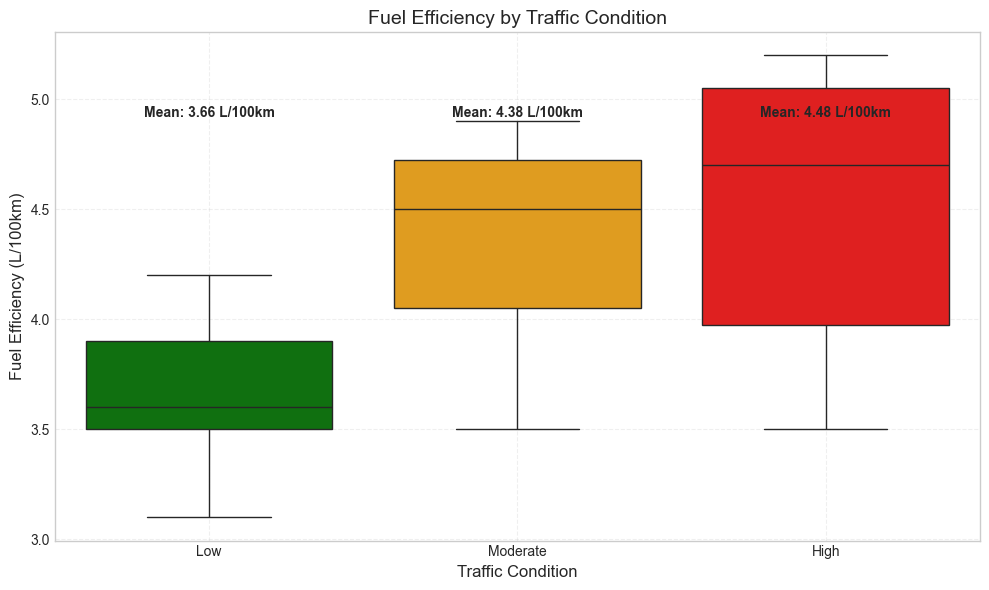

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='traffic_category', y='fuel_efficiency_l_per_100km', data=df,
            order=['Low', 'Moderate', 'High'],
            palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'})
plt.title('Fuel Efficiency by Traffic Condition', fontsize=14)
plt.xlabel('Traffic Condition', fontsize=12)
plt.ylabel('Fuel Efficiency (L/100km)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add mean values as text
for i, traffic in enumerate(['Low', 'Moderate', 'High']):
    mean_val = df[df['traffic_category'] == traffic]['fuel_efficiency_l_per_100km'].mean()
    plt.text(i, df['fuel_efficiency_l_per_100km'].max() * 0.95, f'Mean: {mean_val:.2f} L/100km', 
             ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Scatter Plot: Trip Duration vs. CO2 Emissions

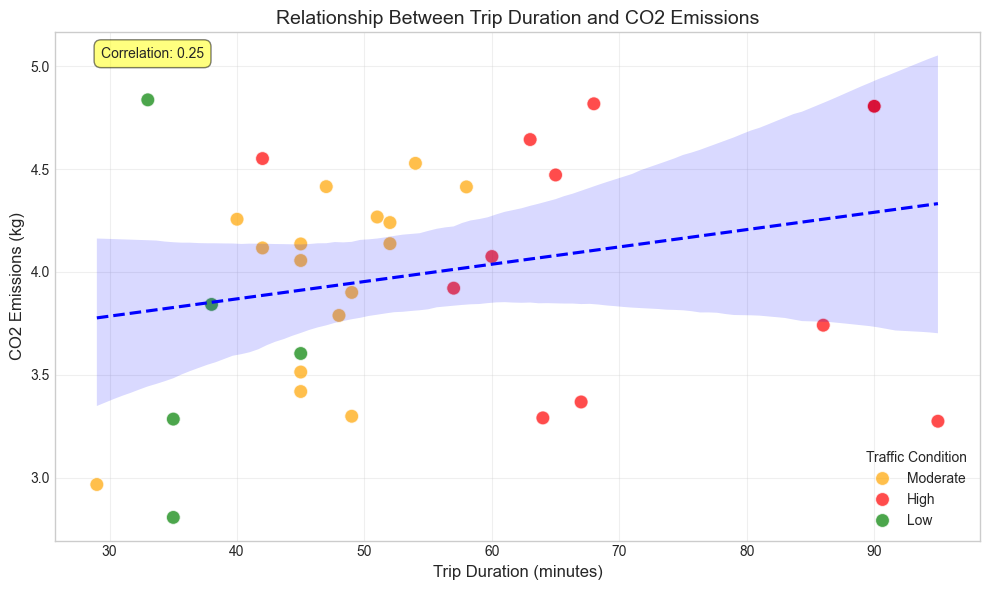

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_duration', y='co2_emissions_kg', 
                hue='traffic_category', palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'},
                s=100, alpha=0.7)

# Add a linear regression line
sns.regplot(data=df, x='trip_duration', y='co2_emissions_kg', 
            scatter=False, line_kws={'color': 'blue', 'linestyle': '--'})

plt.title('Relationship Between Trip Duration and CO2 Emissions', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('CO2 Emissions (kg)', fontsize=12)
plt.grid(True, alpha=0.3)

# Calculate and display correlation coefficient
corr = df['trip_duration'].corr(df['co2_emissions_kg'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.legend(title='Traffic Condition')
plt.tight_layout()
plt.show()

## 8. Departure Hour Analysis

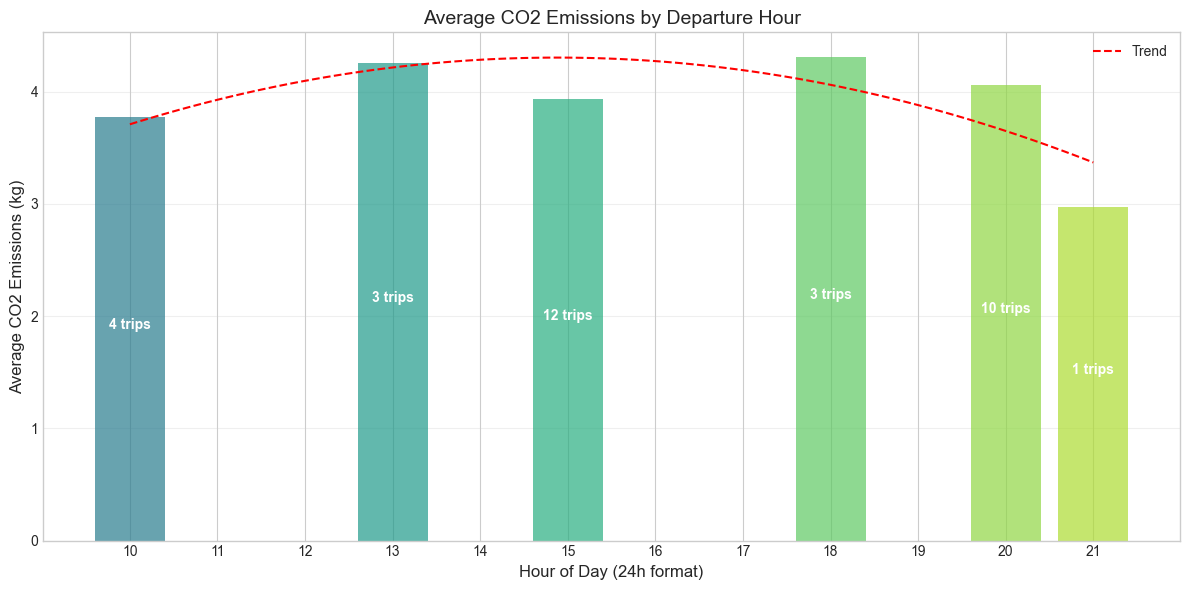

In [10]:
# Group by departure hour and calculate average CO2 emissions
hour_emissions = df.groupby('departure_hour')['co2_emissions_kg'].mean().reset_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(hour_emissions['departure_hour'], hour_emissions['co2_emissions_kg'], 
        color=[plt.cm.viridis(x/24) for x in hour_emissions['departure_hour']], alpha=0.7)

# Add count of trips for each hour
hour_counts = df.groupby('departure_hour').size()
for i, (hour, count) in enumerate(hour_counts.items()):
    if hour in hour_emissions['departure_hour'].values:
        idx = hour_emissions['departure_hour'].tolist().index(hour)
        plt.text(hour, hour_emissions['co2_emissions_kg'].iloc[idx] * 0.5, 
                f'{count} trips', ha='center', color='white', fontweight='bold')

plt.title('Average CO2 Emissions by Departure Hour', fontsize=14)
plt.xlabel('Hour of Day (24h format)', fontsize=12)
plt.ylabel('Average CO2 Emissions (kg)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, axis='y', alpha=0.3)

# Add a trend line
z = np.polyfit(hour_emissions['departure_hour'], hour_emissions['co2_emissions_kg'], 2)
p = np.poly1d(z)
x_line = np.linspace(hour_emissions['departure_hour'].min(), hour_emissions['departure_hour'].max(), 100)
plt.plot(x_line, p(x_line), "--", color='red', label='Trend')

plt.legend()
plt.tight_layout()
plt.show()

## 9. Visualization of Trip Direction Impact

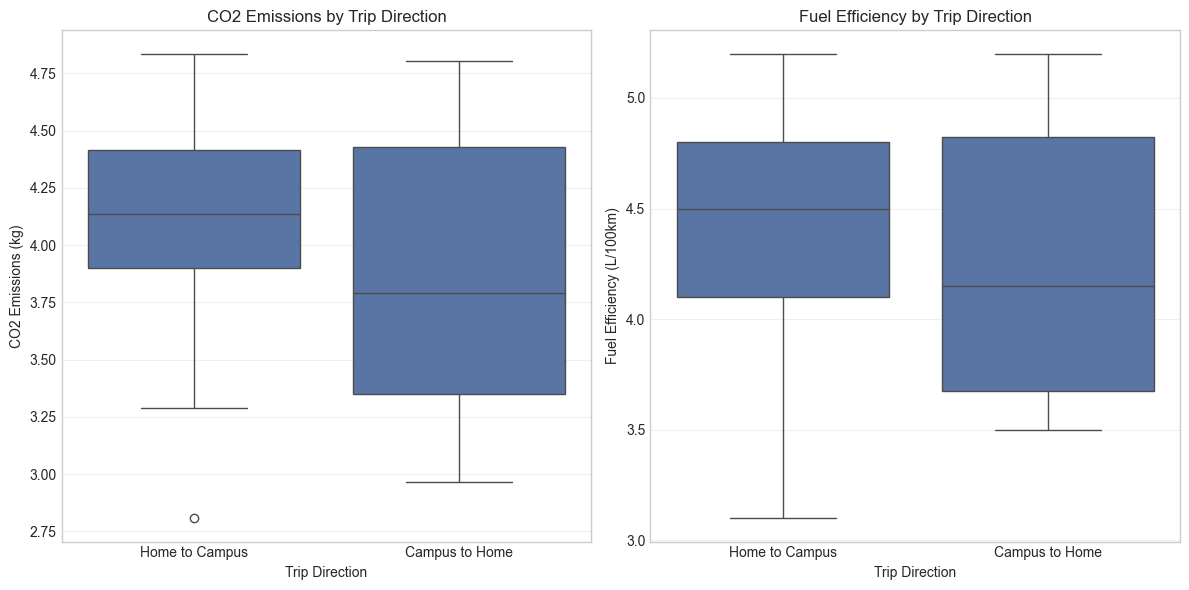

Mean values by trip direction:


,co2_emissions_kg,fuel_efficiency_l_per_100km,trip_duration
trip_direction,,,
Campus to Home,3.88,4.25,58.19
Home to Campus,4.09,4.36,50.18


In [11]:
plt.figure(figsize=(12, 6))

# Prepare data for side-by-side boxplots
plt.subplot(1, 2, 1)
sns.boxplot(x='trip_direction', y='co2_emissions_kg', data=df)
plt.title('CO2 Emissions by Trip Direction', fontsize=12)
plt.xlabel('Trip Direction', fontsize=10)
plt.ylabel('CO2 Emissions (kg)', fontsize=10)
plt.grid(True, axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
sns.boxplot(x='trip_direction', y='fuel_efficiency_l_per_100km', data=df)
plt.title('Fuel Efficiency by Trip Direction', fontsize=12)
plt.xlabel('Trip Direction', fontsize=10)
plt.ylabel('Fuel Efficiency (L/100km)', fontsize=10)
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Display mean values by direction
direction_means = df.groupby('trip_direction')[['co2_emissions_kg', 'fuel_efficiency_l_per_100km', 'trip_duration']].mean().round(2)
print("Mean values by trip direction:")
direction_means

## 10. Day of Week Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_1884\747744436.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='co2_emissions_kg', data=df, order=days_in_data, palette='viridis')


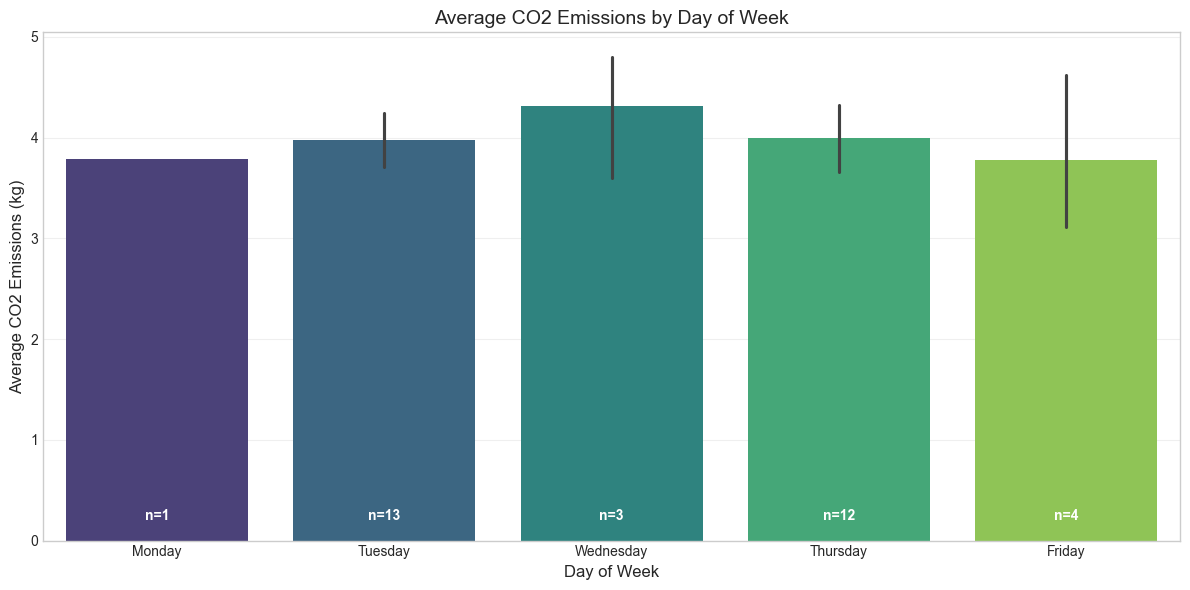

In [12]:
# Order days of the week properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_in_data = [day for day in day_order if day in df['day_of_week'].unique()]

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='co2_emissions_kg', data=df, order=days_in_data, palette='viridis')
plt.title('Average CO2 Emissions by Day of Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Average CO2 Emissions (kg)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)

# Add count labels
day_counts = df.groupby('day_of_week').size()
for i, day in enumerate(days_in_data):
    if day in day_counts.index:
        plt.text(i, 0.2, f'n={day_counts[day]}', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Speed vs. Emissions Analysis

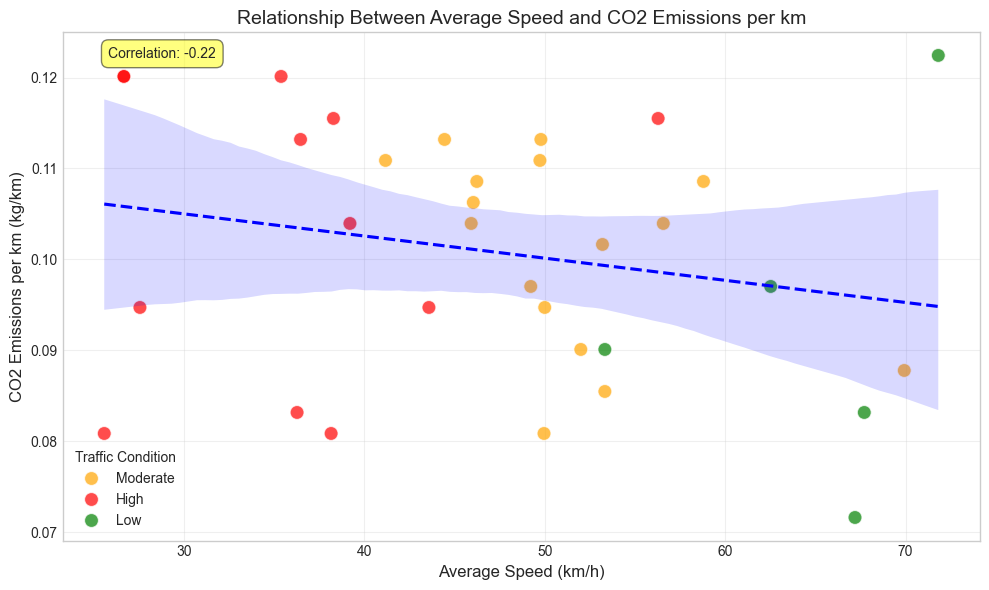

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_speed_kmh', y='co2_per_km', 
                hue='traffic_category', palette={'Low': 'green', 'Moderate': 'orange', 'High': 'red'},
                s=100, alpha=0.7)

# Add a trend line
sns.regplot(data=df, x='avg_speed_kmh', y='co2_per_km', 
            scatter=False, line_kws={'color': 'blue', 'linestyle': '--'})

plt.title('Relationship Between Average Speed and CO2 Emissions per km', fontsize=14)
plt.xlabel('Average Speed (km/h)', fontsize=12)
plt.ylabel('CO2 Emissions per km (kg/km)', fontsize=12)
plt.grid(True, alpha=0.3)

# Calculate and display correlation coefficient
corr = df['avg_speed_kmh'].corr(df['co2_per_km'])
plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

plt.legend(title='Traffic Condition')
plt.tight_layout()
plt.show()

## Visualization Summary

From our visualizations, we can observe several key patterns:

1. **Traffic Conditions and CO2 Emissions**: The boxplots and histograms show that high traffic conditions tend to result in higher CO2 emissions compared to low and moderate traffic conditions. This suggests that traffic congestion increases the carbon footprint of commuting.

2. **Trip Duration Impact**: Longer trips are associated with higher CO2 emissions, as shown in the scatter plot. This relationship is expected since longer trips generally consume more fuel.

3. **Fuel Efficiency Patterns**: Fuel efficiency varies with traffic conditions, with high traffic generally showing worse fuel economy (higher L/100km values).

4. **Time of Day Effects**: The departure hour analysis reveals that certain times of day are associated with higher emissions, potentially corresponding to rush hour periods.

5. **Trip Direction Differences**: There are observable differences in emissions and fuel efficiency between trips from home to campus versus campus to home.

6. **Speed-Emissions Relationship**: The average speed shows a negative correlation with emissions per kilometer, suggesting that steady, moderate speeds may be more efficient than stop-and-go traffic.

These visualizations help us better understand the factors affecting commute carbon footprint and can inform strategies to reduce environmental impact.